In [1]:
import sys
import os
import pandas as pd

script_dir=r'E:\code\WEEK3\IINSURANCE_ANALAYSIS\scripts'
src_dir = r'E:\code\WEEK3\IINSURANCE_ANALAYSIS\src'
data_dir = r'E:\code\WEEK3\IINSURANCE_ANALAYSIS\data'
sys.path.append(script_dir)
sys.path.append(src_dir)
sys.path.append(data_dir)
from utils import InsuranceDataUtils

In [3]:
txt_file_path = r'E:\code\WEEK3\IINSURANCE_ANALAYSIS\data\MachineLearningRating_v3.txt'
df = pd.read_csv(txt_file_path, delimiter='|', encoding='utf-8', low_memory=False)
# Ensure the data directory exists
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
# Define path for the CSV file
csv_file_path = os.path.join(data_dir, 'raw_data.csv')
# Save the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

In [4]:
csv_file_path = r'E:\code\WEEK3\IINSURANCE_ANALAYSIS\data\raw_data.csv'
# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file_path, low_memory=False)

In [5]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [6]:
utils = InsuranceDataUtils(df)
# Get descriptive statistics for numerical features
variability = utils.descriptive_statistics()
print("Descriptive Statistics:\n", variability)

Descriptive Statistics:
        UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  9.995460e+05   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.487770e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.360381e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear      Cylinders  cubiccapacity      kilowatts  \
count      1.000098e+06  999546.000000  999546.000000  999546.000000   
mean       2.010225e+03       4.046642    2466.743258      97.207919   
std        3.261391e+00       0.294020     442.800640      19.393256   
min        1.987000e+03       0.000000

In [7]:
# Review the data structure
column_types = utils.data_structure()
print("\nData Structure:\n", column_types)


missing_values = df.isnull().sum()

# Display columns with missing values
missing_values_summary = missing_values[missing_values > 0]

print("Missing Values Summary:")
print(missing_values_summary)



Data Structure:
 UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDo

In [8]:
# Create an instance of InsuranceDataUtils
utils = InsuranceDataUtils(df)

# Handle missing values
df_cleaned = utils.handle_missing_values()

# Check the result
print("Missing Values Summary:")
print(df_cleaned.isnull().sum())

Missing Values Summary:
UnderwrittenCoverID         0
PolicyID                    0
TransactionMonth            0
IsVATRegistered             0
Citizenship                 0
LegalType                   0
Title                       0
Language                    0
Bank                        0
AccountType                 0
MaritalStatus               0
Gender                      0
Country                     0
Province                    0
PostalCode                  0
MainCrestaZone              0
SubCrestaZone               0
ItemType                    0
mmcode                      0
VehicleType                 0
RegistrationYear            0
make                        0
Model                       0
Cylinders                   0
cubiccapacity               0
kilowatts                   0
bodytype                    0
NumberOfDoors               0
VehicleIntroDate            0
AlarmImmobiliser            0
TrackingDevice              0
CapitalOutstanding          0
NewVehicle      

In [10]:
#Save the cleaned DataFrame to a CSV file
cleaned_csv_file_path = r'E:\code\WEEK3\IINSURANCE_ANALAYSIS\data\cleaned_data.csv'
df_cleaned.to_csv(cleaned_csv_file_path, index=False)



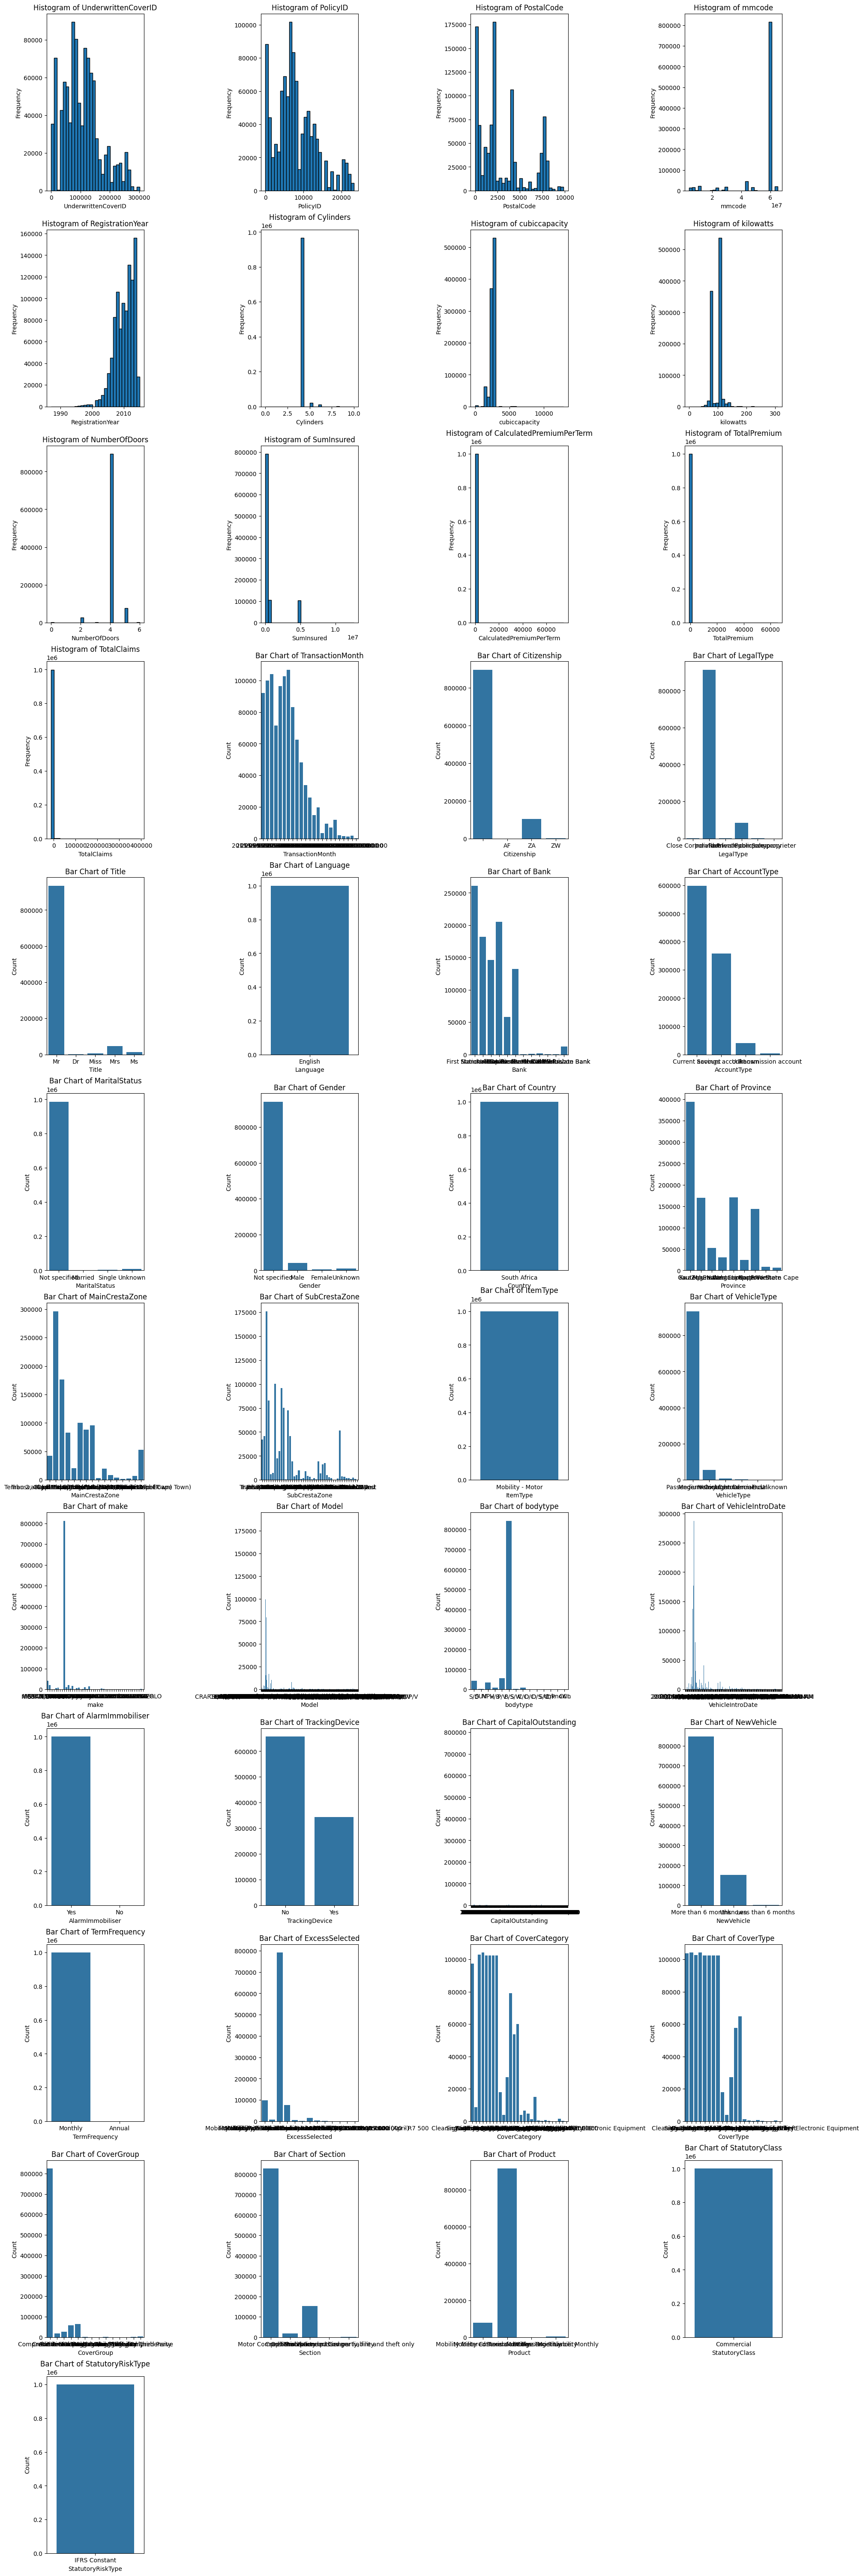

In [11]:
import pandas as pd
cleaned_csv_file_path = r'E:\code\WEEK3\IINSURANCE_ANALAYSIS\data\cleaned_data.csv'
df_cleaned= pd.read_csv(cleaned_csv_file_path, low_memory=False)
analysis = InsuranceDataUtils(df_cleaned)
analysis.univariate_analysis()

Missing values found in MonthlyTotalPremiumChange or MonthlyTotalClaimsChange after filling:
MonthlyTotalPremiumChange    1
MonthlyTotalClaimsChange     1
dtype: int64


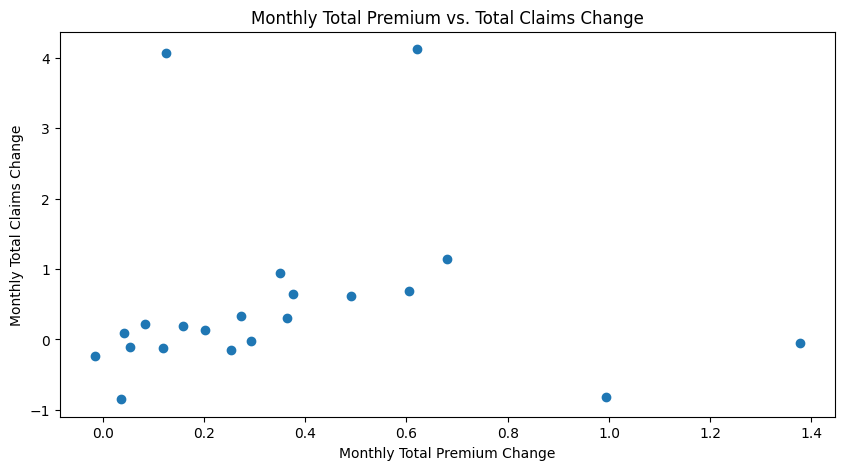

Correlation Matrix:
                           MonthlyTotalPremiumChange  MonthlyTotalClaimsChange
MonthlyTotalPremiumChange                   1.000000                  0.053804
MonthlyTotalClaimsChange                    0.053804                  1.000000


In [12]:
import pandas as pd
cleaned_csv_file_path = r'E:\code\WEEK3\IINSURANCE_ANALAYSIS\data\cleaned_data.csv'
df_cleaned= pd.read_csv(cleaned_csv_file_path, low_memory=False)
analysis = InsuranceDataUtils(df_cleaned)
analysis.bivariate_analysis()

In [13]:
import pandas as pd
cleaned_csv_file_path = r'E:\code\WEEK3\IINSURANCE_ANALAYSIS\data\cleaned_data.csv'
df_cleaned= pd.read_csv(cleaned_csv_file_path, low_memory=False)
print(df_cleaned.columns)
print(df_cleaned['Province'].head())

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'AlarmImmobiliser', 'TrackingDevice',
       'CapitalOutstanding', 'NewVehicle', 'SumInsured', 'TermFrequency',
       'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory',
       'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass',
       'StatutoryRiskType', 'TotalPremium', 'TotalClaims'],
      dtype='object')
0    Gauteng
1    Gauteng
2    Gauteng
3    Gauteng
4    Gauteng
Name: Province, dtype: object


Missing values found in MonthlyTotalPremiumChange or MonthlyTotalClaimsChange after calculating changes:
MonthlyTotalPremiumChange    1
MonthlyTotalClaimsChange     1
dtype: int64
Columns after preprocessing:
Index(['Date', 'TotalPremium', 'TotalClaims', 'MonthlyTotalPremiumChange',
       'MonthlyTotalClaimsChange'],
      dtype='object')


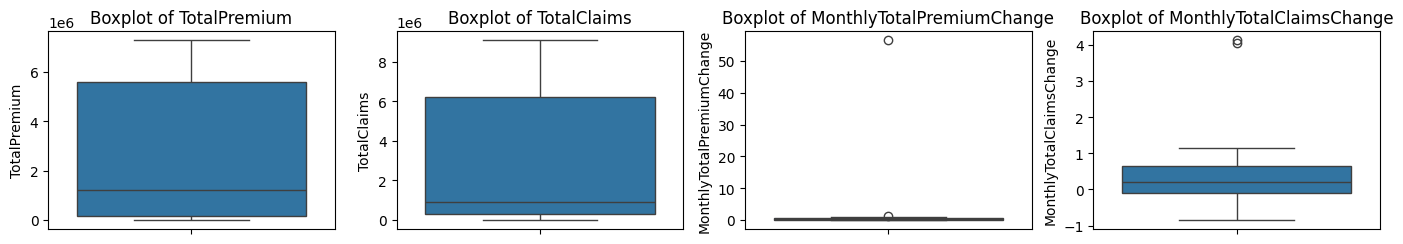

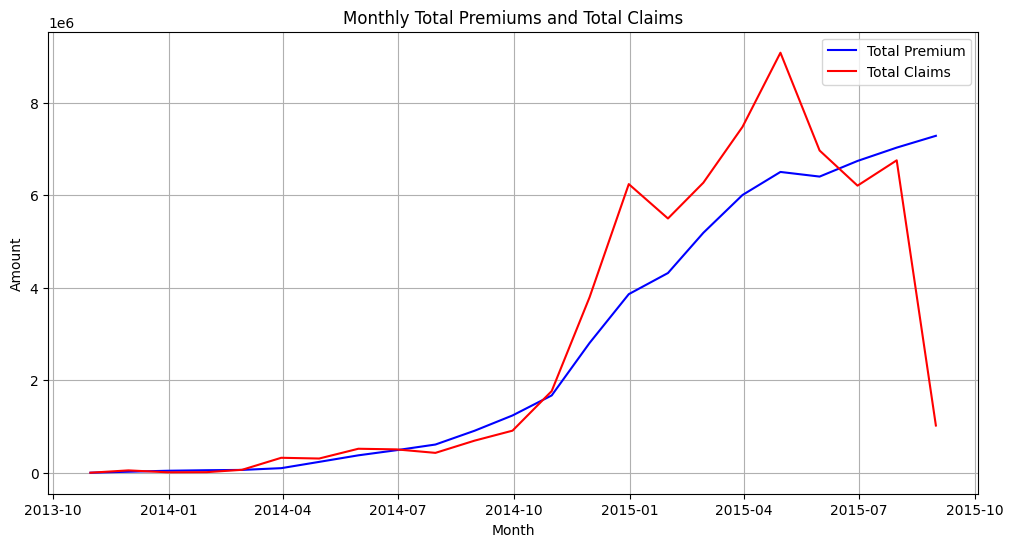

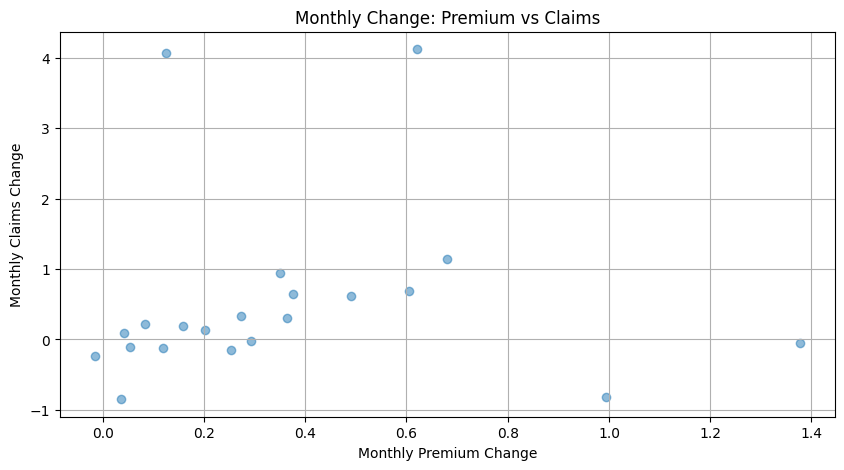

In [14]:
insurance_utils = InsuranceDataUtils(df_cleaned)
insurance_utils.preprocess_data()
#insurance_utils.compare_data()
# Detect outliers
insurance_utils.detect_outliers()
# Produce creative and beautiful plots
insurance_utils.visualize_data()